In [39]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import skimage.io
import skimage.transform

import tensorflow as tf
import keras

from keras.preprocessing.image import ImageDataGenerator

np.random.seed(24)

In [40]:
training_set_dir = r"/Users/lukeelliott/Thinkful/Bootcamp/Unit 6/TensorFlow/dataset_updated/training_set"
validation_set_dir = r"/Users/lukeelliott/Thinkful/Bootcamp/Unit 6/TensorFlow/dataset_updated/validation_set"

cats = ['drawings', 'engraving', 'iconography', 'painting', 'sculpture']

labels = {'drawings':0, 'engraving':1, 'iconography':2, 'painting':3, 'sculpture':4}

In [41]:
img_dict = {}

for cat in cats:
    cat_names = os.listdir(os.path.join(training_set_dir, cat))
    img_dict[cat] = cat_names

In [42]:
img_and_cat = []

img_dimensions = (128, 128, 3)

for cat in cats:
    for img in img_dict[cat][0:200]:
        try:
            nd_img = skimage.io.imread(os.path.join(training_set_dir, cat, img))
            nd_img = skimage.transform.resize(nd_img, img_dimensions)
            img_and_cat.append((nd_img, cat))
        except OSError:
            pass

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [43]:
import random

img_and_cat = random.sample(img_and_cat, len(img_and_cat))

In [44]:
train_data = [x[0] for x in img_and_cat]
train_labels = [x[1] for x in img_and_cat]

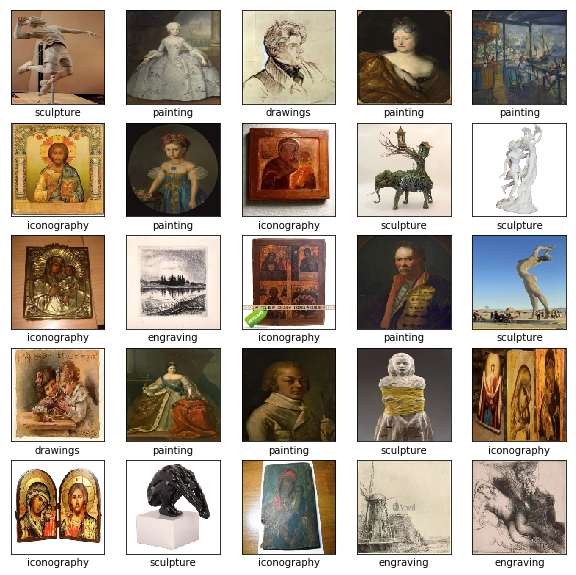

In [45]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

In [46]:
train_labels = [labels[x] for x in train_labels]
train_labels = np.array(train_labels)

train_data = np.array(train_data)

In [47]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen.fit(train_data)

In [48]:
data_flow = datagen.flow(train_data, train_labels, batch_size=32)

### Model 1

In [49]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(128, 128, 3)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(5, activation=tf.nn.softmax)
])


In [50]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [51]:
model.fit_generator(data_flow, steps_per_epoch=len(train_data)/32, epochs=5)

Epoch 1/5
31/30 [==============================] - 11s 365ms/step - loss: 9.3983 - acc: 0.3793
Epoch 2/5
31/30 [==============================] - 9s 279ms/step - loss: 9.2372 - acc: 0.4226
Epoch 3/5
31/30 [==============================] - 7s 236ms/step - loss: 9.2409 - acc: 0.4217
Epoch 4/5
31/30 [==============================] - 9s 300ms/step - loss: 9.1230 - acc: 0.4254
Epoch 5/5
31/30 [==============================] - 7s 237ms/step - loss: 9.5874 - acc: 0.4014


### Model 2

In [54]:
model2 = keras.Sequential()

model2.add(keras.layers.Dense(64, activation='relu', input_shape=(128, 128, 3)))
model2.add(keras.layers.Dropout(0.1))
model2.add(keras.layers.Dense(64, activation='relu'))
model2.add(keras.layers.Dropout(0.1))
model2.add(keras.layers.Dense(5, activation='softmax'))
model.summary()

model2.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 49152)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               6291584   
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 645       
Total params: 6,292,229
Trainable params: 6,292,229
Non-trainable params: 0
_________________________________________________________________


In [55]:
model2.fit_generator(data_flow, steps_per_epoch=len(train_data)/32, epochs=5)

Epoch 1/5


ValueError: Error when checking target: expected dense_14 to have 4 dimensions, but got array with shape (32, 1)

In [58]:
v_img_dict = {}

for cat in cats:
    cat_names = os.listdir(os.path.join(validation_set_dir, cat))
    v_img_dict[cat] = cat_names

In [59]:
v_img_and_cat = []

for cat in cats:
    for img in v_img_dict[cat][0:100]:
        try:
            nd_img = skimage.io.imread(os.path.join(validation_set_dir, cat, img))
            nd_img = skimage.transform.resize(nd_img, img_dimensions)
            v_img_and_cat.append((nd_img, cat))
        except OSError:
            pass

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [60]:
v_img_and_cat = random.sample(v_img_and_cat, len(v_img_and_cat))


validation_data = [x[0] for x in v_img_and_cat]
validation_labels = [x[1] for x in v_img_and_cat]

validation_data = np.array(validation_data)

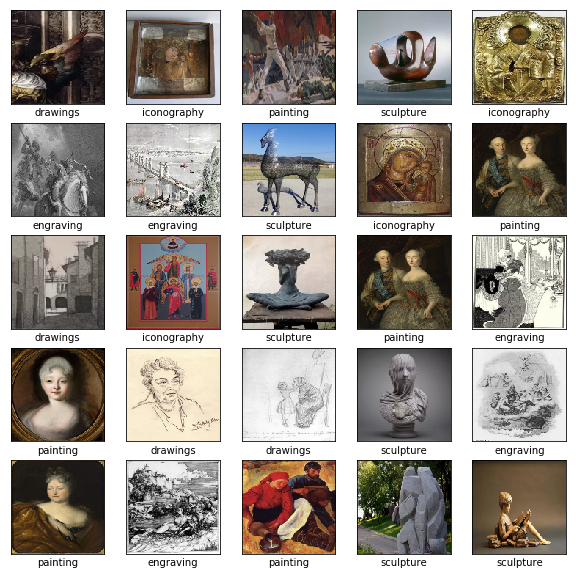

In [61]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(validation_data[i], cmap=plt.cm.binary)
    plt.xlabel(validation_labels[i])

With this step, I have the train data stored as tensors and ready for modeling.